<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement:</a></span></li><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Packages</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Feature-Distributions" data-toc-modified-id="Visualizing-Feature-Distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing Feature Distributions</a></span></li><li><span><a href="#Daily-Gross-Sales-Correlation-Heatmap" data-toc-modified-id="Daily-Gross-Sales-Correlation-Heatmap-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Daily Gross Sales Correlation Heatmap</a></span></li><li><span><a href="#Daily-Gross-Sales-(in-thousands)" data-toc-modified-id="Daily-Gross-Sales-(in-thousands)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Daily Gross Sales (in thousands)</a></span></li></ul></li><li><span><a href="#ACF-&amp;-PACF-Plots" data-toc-modified-id="ACF-&amp;-PACF-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ACF &amp; PACF Plots</a></span></li><li><span><a href="#ADF-Test-for-Stationarity" data-toc-modified-id="ADF-Test-for-Stationarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ADF Test for Stationarity</a></span></li><li><span><a href="#Model-Prep" data-toc-modified-id="Model-Prep-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Prep</a></span></li><li><span><a href="#Model-Selection-with-AIC:" data-toc-modified-id="Model-Selection-with-AIC:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Selection with AIC:</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#r2-Metric-Score" data-toc-modified-id="r2-Metric-Score-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>r2 Metric Score</a></span></li><li><span><a href="#RMSE-Metric-Score" data-toc-modified-id="RMSE-Metric-Score-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>RMSE Metric Score</a></span></li><li><span><a href="#Residuals-Plot" data-toc-modified-id="Residuals-Plot-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Residuals Plot</a></span></li><li><span><a href="#Sales-Predictions-SARIMAX-Graph" data-toc-modified-id="Sales-Predictions-SARIMAX-Graph-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Sales Predictions SARIMAX Graph</a></span></li></ul></li><li><span><a href="#Budget-Calculations" data-toc-modified-id="Budget-Calculations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Budget Calculations</a></span><ul class="toc-item"><li><span><a href="#The-Bible:" data-toc-modified-id="The-Bible:-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>The Bible:</a></span></li></ul></li><li><span><a href="#Conclusion-&amp;-Reccomendations" data-toc-modified-id="Conclusion-&amp;-Reccomendations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion &amp; Reccomendations</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Problem Statement:

I am a consultant hired by restaurant owners, since new management has taken over their costs have gone through the roof and now they are 25K in the red on average each month. In order for them to recoup their loss I need to figure out how to properly structure their budgets. I will create a SARIMAX predictive sales model to base my customized bugets from. My metric will be RMSE to gauge my model with because the output will be on the same scale as my data. A succesful model will output predictive sales values within a $500.00 range.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from os import listdir
from os.path import isfile, join

import math

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
# #CREATE FUNCTION THAT READS IN CSV AND AND CLEANS DATA
# def data_reader_cleaner(df):
# # 1) read in csv
# data = pd.read_csv('./data/data_1.csv')
# # 2) reset_index
# data.reset_index(inplace=True)
# # 3)set colunms as row 0 
# data.columns = data.iloc[0]
# # 4) drop first and last columns
# data.drop([0,31], axis = 0, inplace = True)
# # 5) set index as date
#  data.set_index('Date', inplace = True)   
# 6) concats
# return df

In [3]:
def data_reader_cleaner(folder_path):
    data_file_csv = [f for f in listdir(folder_path) if isfile(join(folder_path, f)) & f.endswith('.csv')]
    df = pd.DataFrame()
    for file_path in data_file_csv:
        # 1) read in csv
        data = pd.read_csv(folder_path + file_path)
        # 2) reset_index
        data.reset_index(inplace=True)
        # 3)set colunms as row 0 
        data.columns = data.iloc[0]
        # 4) drop first and last columns
        data.drop([0, len(data)-1], axis = 0, inplace = True)
        # 5) set index as date
        data.set_index('Date', inplace = True) 
        # 6) Print out if nulls
        if data.isnull().sum().sum() > 0:
            data.isnull().sum().sort_values(ascending = False)         
        #  ) concats
        df = pd.concat([data,df])
    return df
merge = data_reader_cleaner('./data/')
merge.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,621,621,621,621,621,621,621,621,621
unique,7,131,285,601,306,607,134,619,620
top,Sunday,59,$0.00,"$4,043.00",$0.00,"$6,029.00",$0.00,$909.48,"$3,048.28"
freq,90,14,21,3,162,3,162,2,2


## Exploratory Data Analysis

In [4]:
t = ["Voids", "Gross Sales", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin"]


In [5]:
merge[t] = merge[t].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [6]:
merge["Bill Count"] = merge["Bill Count"].astype(int)

In [7]:
merge = pd.concat([merge, pd.get_dummies(merge['Day of the Week'])], axis=1)

In [8]:
merge.drop('Day of the Week', axis = 1, inplace = True)

In [9]:
merge.sort_index(inplace = True)

### Visualizing Feature Distributions

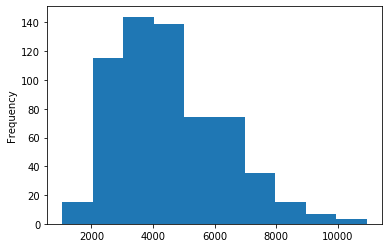

In [10]:
merge["Gross Sales"].plot(kind = "hist")

In [11]:
x_cols = ["Voids", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin", "Bill Count"]    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a8ccfd0>,
      dtype=object)

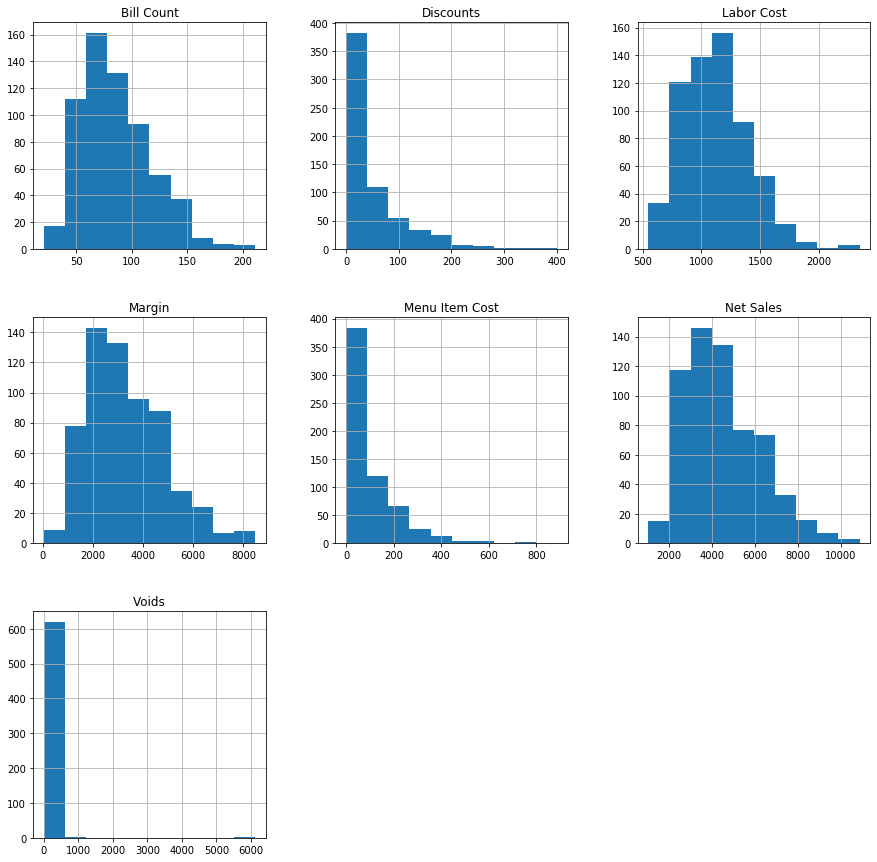

In [12]:
merge[x_cols].hist(figsize=(15, 15))

### Daily Gross Sales Correlation Heatmap 

In [13]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    plt.figure(figsize=(12, 12))
    graph = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return graph

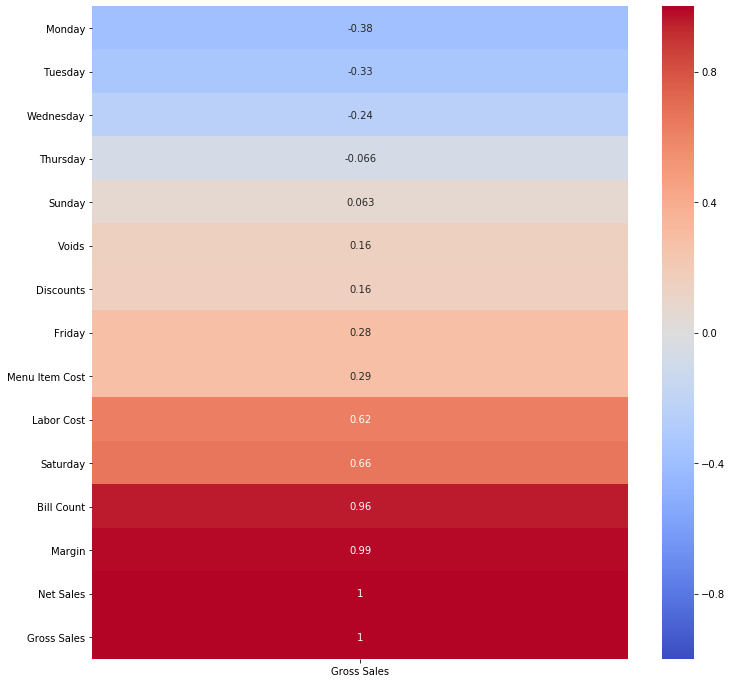

In [14]:
heatmap_numeric_w_dependent_variable(merge, "Gross Sales")

In [15]:
drop_corr_cols = ["Net Sales", "Margin"]

In [16]:
merge.drop(drop_corr_cols, axis = 1, inplace = True)

### Daily Gross Sales (in thousands)

In [17]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

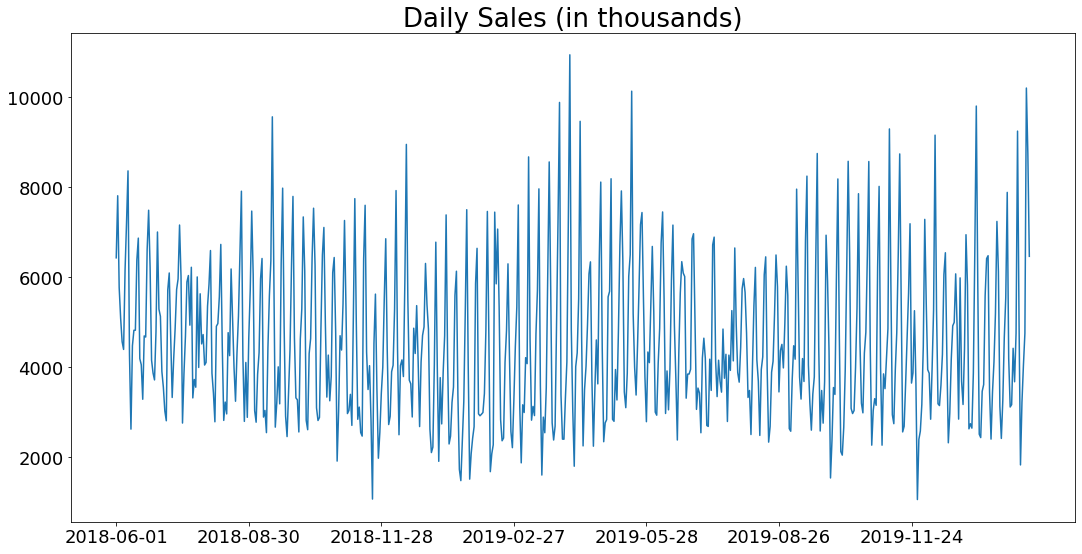

In [18]:
plot_series(merge, ['Gross Sales'], title = "Daily Sales (in thousands)", steps= 90)

## ACF & PACF Plots

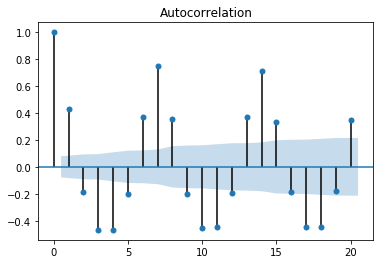

In [19]:
# Generate plot.
plot_acf(merge['Gross Sales'].dropna(), lags=20);

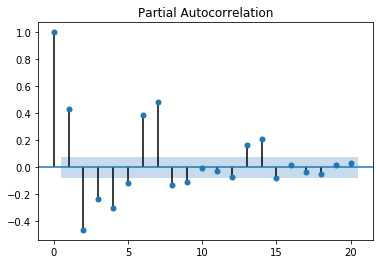

In [20]:
plot_pacf(merge['Gross Sales'].dropna(), lags=20);

## ADF Test for Stationarity

In [21]:
# Run ADF test on original (non-differenced!) data.
adfuller(merge['Gross Sales'])

(-4.413893331869135,
 0.00028047084978728866,
 14,
 606,
 {'1%': -3.4411869900487906,
  '5%': -2.866321181236609,
  '10%': -2.569316262893616},
 9994.277564875969)

In [22]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [23]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(merge['Gross Sales']))

Test Statistic   -4.413893
p-value           0.000280
dtype: float64

## Model Prep

In [24]:
merge.index = pd.DatetimeIndex(merge.index).to_period('d')

In [25]:
621 *.35

217.35

In [26]:
X_test_exog = merge.iloc[:217,:] 

In [27]:
X_train_exog = merge.iloc[:404:]

In [28]:
X_train = X_train_exog.drop("Gross Sales", axis = 1)

In [29]:
X_test = X_test_exog.drop("Gross Sales", axis = 1)

In [30]:
y_train = X_train_exog['Gross Sales']

In [31]:
y_test = X_test_exog['Gross Sales']

## Model Selection with AIC: 

In [32]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]      

In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            
# #  #best params          

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7989.702069938601
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7463.397401632603
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7274.642726553804
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6860.079348177234
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7260.1466576418225
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7091.125153149895
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7017.342987578313
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6766.319566697315
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7747.191675860346
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7446.007105501146
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7127.405912019101
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6648.291104602344
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7454.961710114084
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6901.881474326379
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6890.4557620756295
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6644.501807486621
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7178.999621659536
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6924.191

## Modeling

In [34]:
sarima = SARIMAX(endog = y_train,# inout the best params for this model
                 order = (1, 1, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 12),  # (P, D, Q, S)
                 exog = X_train)
# Fit SARIMA model
model = sarima.fit()

In [35]:
preds = model.predict(start = len(y_train), end = len(y_train) + len(y_test) - 1, exog = X_test)

- Prepping index for graphing

In [36]:
y_test.index = y_test.index.to_timestamp()

In [37]:
y_train.index = y_train.index.to_timestamp()

In [38]:
preds.index = preds.index.to_timestamp()

## Model Evaluation

### Baseline Model

In [39]:
merge["Gross Sales"].mean()

4563.761674718196

### r2 Metric Score

In [40]:
metrics.r2_score(y_test, preds)

0.9131270881192943

### RMSE Metric Score

In [41]:
mse = mean_squared_error(y_test[0:len(y_test)], preds)
mse

210102.17182728768

In [42]:
print(f'RMSE SCORE {math.sqrt(mse)}')

RMSE SCORE 458.36903454235176


### Residuals Plot

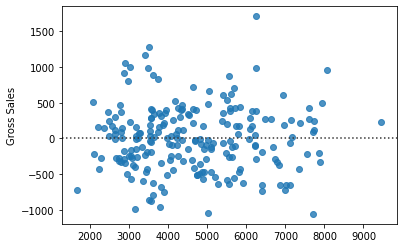

In [43]:
sns.residplot(preds, y_test)

### Sales Predictions SARIMAX Graph

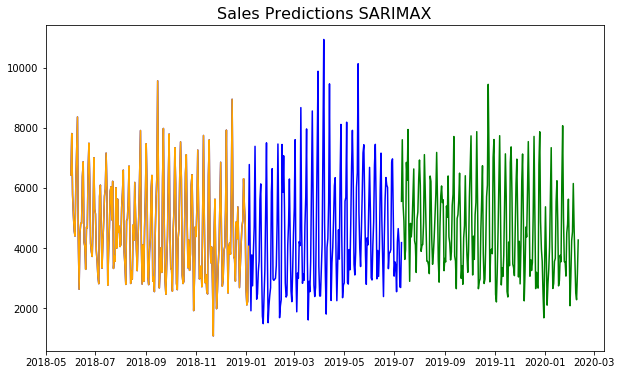

In [44]:
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
# plt.plot(future_forecast, color = 'black')

plt.title(label = 'Sales Predictions SARIMAX', fontsize=16)
plt.show();

## Budget Calculations

### The Bible:

● Total prime less than 60%

● Food cost 25 to 30%

● Labor cost BOH 15% to 20%

● Labor cost FOH 10 to 15%

● Profitmax15%

● 7 extreme low. 12% average 15 is excellent 

In [46]:
preds_weekly = preds[0::7]

In [47]:
preds_weekly = preds_weekly.to_frame()

In [48]:
weekly_preds_sales_total = []
for i in range(0, len(preds), 7):
    chunk = preds[i:i + 7]
    weekly_preds_sales_total.append(chunk.sum())
weekly_preds_sales_total[0]

37884.259315238625

In [49]:
for i, total in enumerate(weekly_preds_sales_total, start=1):
    print(f'Week {i}: Predicted Sales: ${round(total)}')
    print(f'Total Prime Cost Less Than: ${round(total*.6,2)}')
    print(f'Food Cost Guidelines: low = ${round(total*.25,2)} to high = ${round(total*.30,2)}')
    print(f'Labor Cost BOH Guidelines: low = ${round(total*.15,2)} to high = ${round(total*.20,2)} ')
    print(f'Labor Cost FOH Guidelines: low = ${round(total*.1,2)} to high = ${round(total*.15,2)}')
    print(f'Total Profit Guidelines: low = ${round(total*.07,2)}, average = ${round(total*.12,2)} & excellent = ${round(total*.15,2)}')
    print()

Week 1: Predicted Sales: $37884.0
Total Prime Cost Less Than: $22730.56
Food Cost Guidelines: low = $9471.06 to high = $11365.28
Labor Cost BOH Guidelines: low = $5682.64 to high = $7576.85 
Labor Cost FOH Guidelines: low = $3788.43 to high = $5682.64
Total Profit Guidelines: low = $2651.9, average = $4546.11 & excellent = $5682.64

Week 2: Predicted Sales: $35744.0
Total Prime Cost Less Than: $21446.3
Food Cost Guidelines: low = $8935.96 to high = $10723.15
Labor Cost BOH Guidelines: low = $5361.58 to high = $7148.77 
Labor Cost FOH Guidelines: low = $3574.38 to high = $5361.58
Total Profit Guidelines: low = $2502.07, average = $4289.26 & excellent = $5361.58

Week 3: Predicted Sales: $33998.0
Total Prime Cost Less Than: $20398.62
Food Cost Guidelines: low = $8499.42 to high = $10199.31
Labor Cost BOH Guidelines: low = $5099.65 to high = $6799.54 
Labor Cost FOH Guidelines: low = $3399.77 to high = $5099.65
Total Profit Guidelines: low = $2379.84, average = $4079.72 & excellent = $509

## Conclusion & Reccomendations

## References